In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Python_Project_4_Log.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df = df.dropna()
# df.isnull().sum()
df.shape

(183, 12)

In [13]:
x = df.drop(['Survived','Name','Ticket'],axis=1)
y = df.Survived
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,D35,S
872,873,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,female,56.0,0,1,83.1583,C50,C
887,888,1,female,19.0,0,0,30.0000,B42,S


In [15]:
encoding = LabelEncoder()

In [18]:
x['Sex'] = encoding.fit_transform(x['Sex'])
x['Cabin'] = encoding.fit_transform(x['Cabin'])
x['Embarked'] = encoding.fit_transform(x['Embarked'])
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
regmodel = LogisticRegression()
regmodel.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Pclass       183 non-null    int64  
 2   Sex          183 non-null    int64  
 3   Age          183 non-null    float64
 4   SibSp        183 non-null    int64  
 5   Parch        183 non-null    int64  
 6   Fare         183 non-null    float64
 7   Cabin        183 non-null    int64  
 8   Embarked     183 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.3 KB


In [46]:
regmodel.score(X_train,y_train)

0.7808219178082192

In [30]:
regmodel.score(X_test,y_test)

0.8378378378378378

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [32]:
y_pred = regmodel.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
confusion_matrix(y_pred,y_test)

array([[ 6,  1],
       [ 5, 25]], dtype=int64)

In [34]:
accuracy_score(y_pred,y_test)

0.8378378378378378

In [37]:
precision_score(y_pred,y_test)

0.9615384615384616

In [38]:
recall_score(y_pred,y_test)

0.8333333333333334

In [39]:
f1_score(y_pred,y_test)

0.8928571428571429

In [43]:
y_prob = regmodel.predict_proba(X_test)
y_prob

array([[0.06343574, 0.93656426],
       [0.40656706, 0.59343294],
       [0.73686035, 0.26313965],
       [0.02998037, 0.97001963],
       [0.04844904, 0.95155096],
       [0.57028813, 0.42971187],
       [0.64763225, 0.35236775],
       [0.09472038, 0.90527962],
       [0.46655574, 0.53344426],
       [0.06278018, 0.93721982],
       [0.60296116, 0.39703884],
       [0.12887069, 0.87112931],
       [0.10861422, 0.89138578],
       [0.5699111 , 0.4300889 ],
       [0.33439261, 0.66560739],
       [0.44931026, 0.55068974],
       [0.38218629, 0.61781371],
       [0.33950791, 0.66049209],
       [0.37338646, 0.62661354],
       [0.33823305, 0.66176695],
       [0.05897298, 0.94102702],
       [0.06698951, 0.93301049],
       [0.43388856, 0.56611144],
       [0.07306783, 0.92693217],
       [0.0723145 , 0.9276855 ],
       [0.42062501, 0.57937499],
       [0.18405447, 0.81594553],
       [0.09984645, 0.90015355],
       [0.07696201, 0.92303799],
       [0.06895156, 0.93104844],
       [0.

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

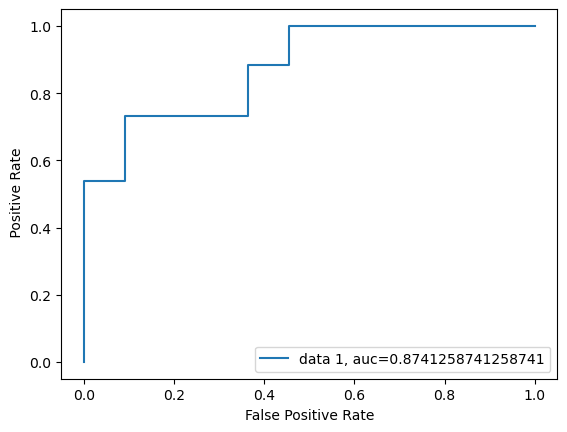

In [45]:
y_pred_proba = regmodel.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()